In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("netflix_titles.csv")

In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<AxesSubplot:ylabel='type'>

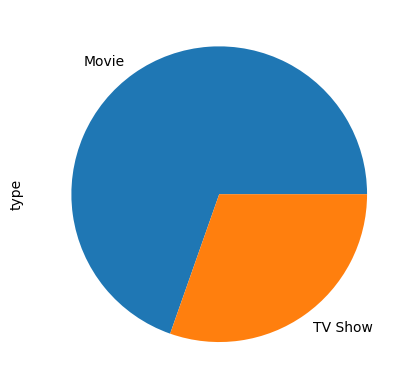

In [5]:
df["type"].value_counts().plot(kind="pie")

<AxesSubplot:>

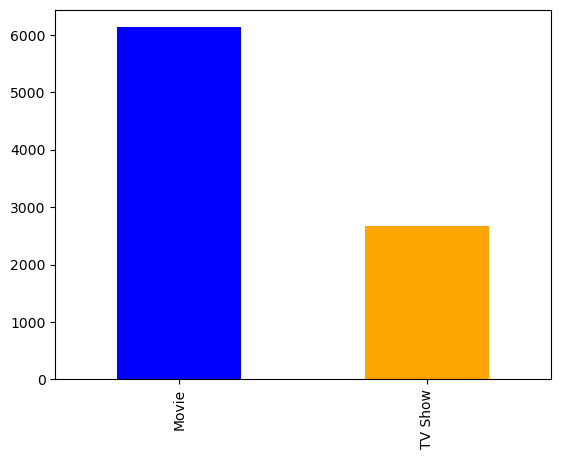

In [6]:
df["type"].value_counts().plot(kind="bar",color=['blue', 'orange'])

In [75]:
df.groupby("type").count()["country"]

type
Movie      5691
TV Show    2285
Name: country, dtype: int64

<AxesSubplot:>

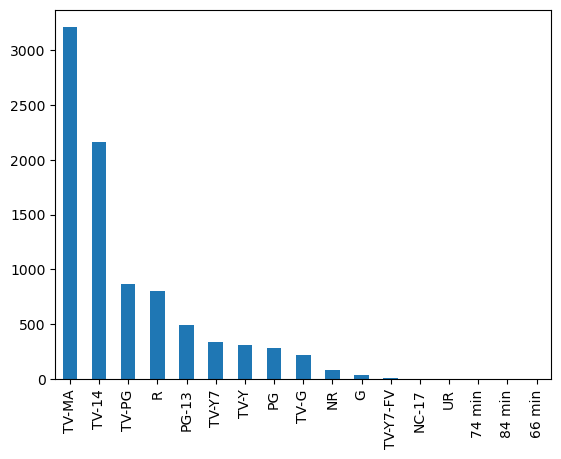

In [76]:
df["rating"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='release_year'>

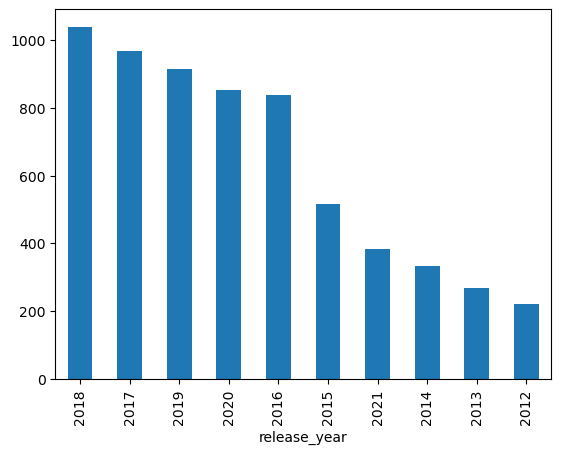

In [77]:
ddd = df.groupby("release_year")["country"].count()
top_n = 10
top_countries = ddd.nlargest(top_n)
top_countries.plot(kind="bar")

In [10]:
df1 = df[df["country"] == "United States"]

In [11]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


In [12]:
df1["type"].value_counts()

Movie      2058
TV Show     760
Name: type, dtype: int64

In [13]:
df1["listed_in"].value_counts().head(15)

Documentaries                           249
Stand-Up Comedy                         209
Children & Family Movies, Comedies       90
Dramas                                   88
Comedies                                 84
Children & Family Movies                 80
Kids' TV                                 77
Dramas, Independent Movies               74
Reality TV                               71
Action & Adventure                       64
Comedies, Dramas, Independent Movies     63
TV Comedies                              61
Docuseries                               61
Documentaries, Music & Musicals          59
Comedies, Romantic Movies                55
Name: listed_in, dtype: int64

In [159]:
df2 = df[~df["duration"].str.contains("Season", case=False, na=False)]

In [160]:
df2['duration'] = df2['duration'].astype(str).str.extract('(\d+)').astype(float)

/var/folders/55/6zmgdc_d7q526rnkxvcdm7_40000gn/T/ipykernel_28567/2055601642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['duration'] = df2['duration'].astype(str).str.extract('(\d+)').astype(float)


(array([5.000e+00, 1.900e+01, 7.600e+01, 4.700e+01, 3.900e+01, 9.100e+01,
        1.310e+02, 1.890e+02, 2.160e+02, 2.800e+02, 5.230e+02, 1.076e+03,
        9.740e+02, 7.350e+02, 4.660e+02, 3.940e+02, 2.960e+02, 2.000e+02,
        1.090e+02, 8.700e+01, 7.100e+01, 3.400e+01, 2.300e+01, 1.600e+01,
        1.100e+01, 3.000e+00, 6.000e+00, 2.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  3.   ,  10.725,  18.45 ,  26.175,  33.9  ,  41.625,  49.35 ,
         57.075,  64.8  ,  72.525,  80.25 ,  87.975,  95.7  , 103.425,
        111.15 , 118.875, 126.6  , 134.325, 142.05 , 149.775, 157.5  ,
        165.225, 172.95 , 180.675, 188.4  , 196.125, 203.85 , 211.575,
        219.3  , 227.025, 234.75 , 242.475, 250.2  , 257.925, 265.65 ,
        273.375, 281.1  , 288.825, 296.55 , 304.275, 312.   ]),
 <BarContainer object of 40 artists>)

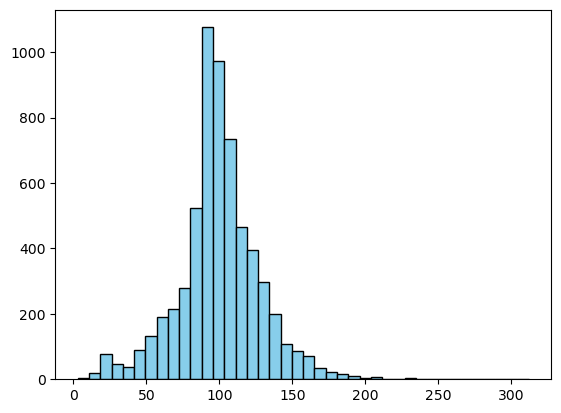

In [161]:
plt.hist(df2["duration"], bins=40, edgecolor='black', color='skyblue')  

In [116]:
Season = df[df["duration"].str.contains("Season", case=False, na=False)]
Season.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,NaN


<AxesSubplot:>

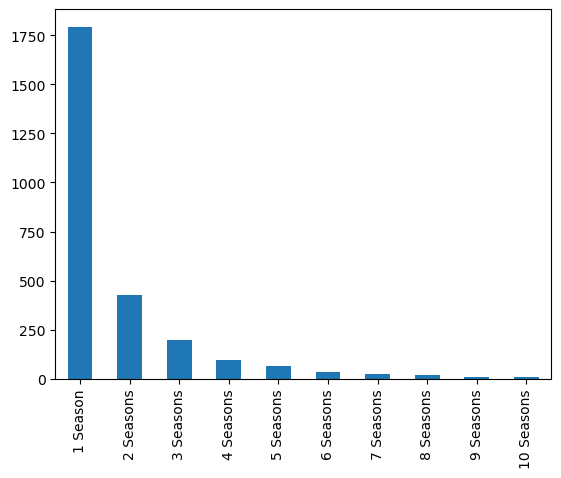

In [120]:
Season["duration"].value_counts().head(10).plot(kind="bar")

In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
df["director"].value_counts().head(30)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Lance Bangs                8
Kunle Afolayan             8
Quentin Tarantino          8
Ryan Polito                8
Troy Miller                8
Shannon Hartman            8
Fernando Ayllón            8
Robert Rodriguez           8
Hakan Algül                8
Johnnie To                 8
Ozan Açıktan               7
Justin G. Dyck             7
Omoni Oboli                7
Clint Eastwood             7
S.S. Rajamouli             7
Hidenori Inoue             7
Mae Czarina Cruz           7
Name: director, dtype: int64

In [104]:
df["director"].isnull().sum()

2634

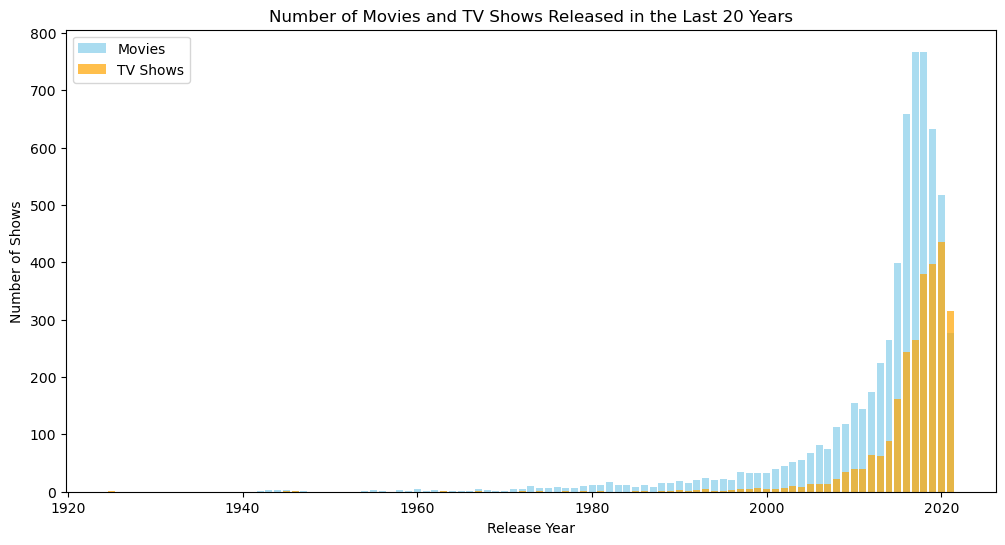

In [105]:
import matplotlib.pyplot as plt

# Filter data for movies
d1 = df[df["type"] == "Movie"]
count_per_year_movie = d1.groupby("release_year")['show_id'].count()

# Filter data for TV shows
d2 = df[df["type"] == "TV Show"]
count_per_year_tv_show = d2.groupby("release_year")['show_id'].count()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the bar chart for movies
plt.bar(count_per_year_movie.index, count_per_year_movie.values, color='skyblue', label='Movies', alpha=0.7)

# Plotting the bar chart for TV shows
plt.bar(count_per_year_tv_show.index, count_per_year_tv_show.values, color='orange', label='TV Shows', alpha=0.7)

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Movies and TV Shows Released in the Last 20 Years')
plt.legend()  # Adding a legend to differentiate between movies and TV shows

# Display the plot
plt.show()


In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [99]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the month and create a new column
df['month'] = df2['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


<AxesSubplot:xlabel='month'>

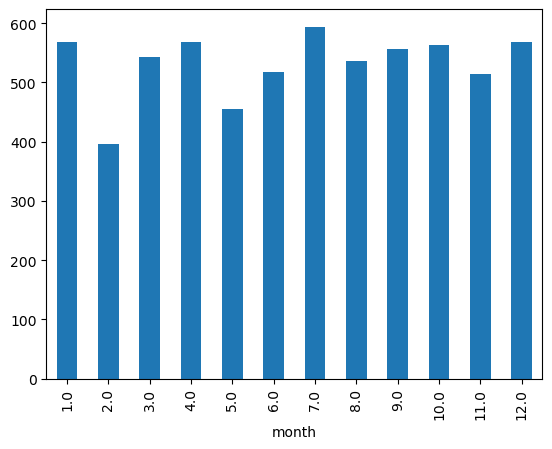

In [100]:
df.groupby("month")["show_id"].count().plot(kind="bar")

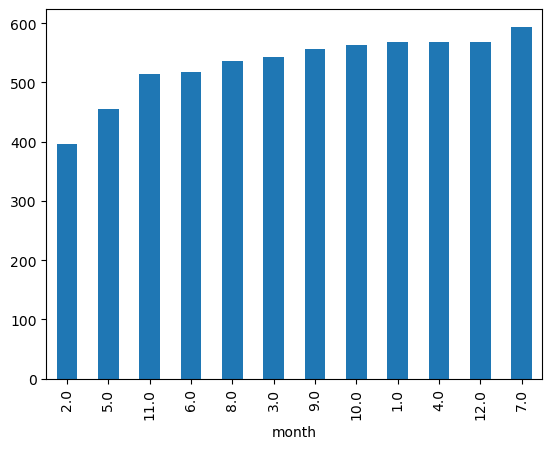

In [102]:
df_sorted = df.groupby("month")["show_id"].count().sort_values()

df_sorted.plot(kind="bar")

plt.show()

In [42]:
old = df.sort_values("release_year", ascending = True)
old[["title", "release_year"]].head(20)

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


<AxesSubplot:>

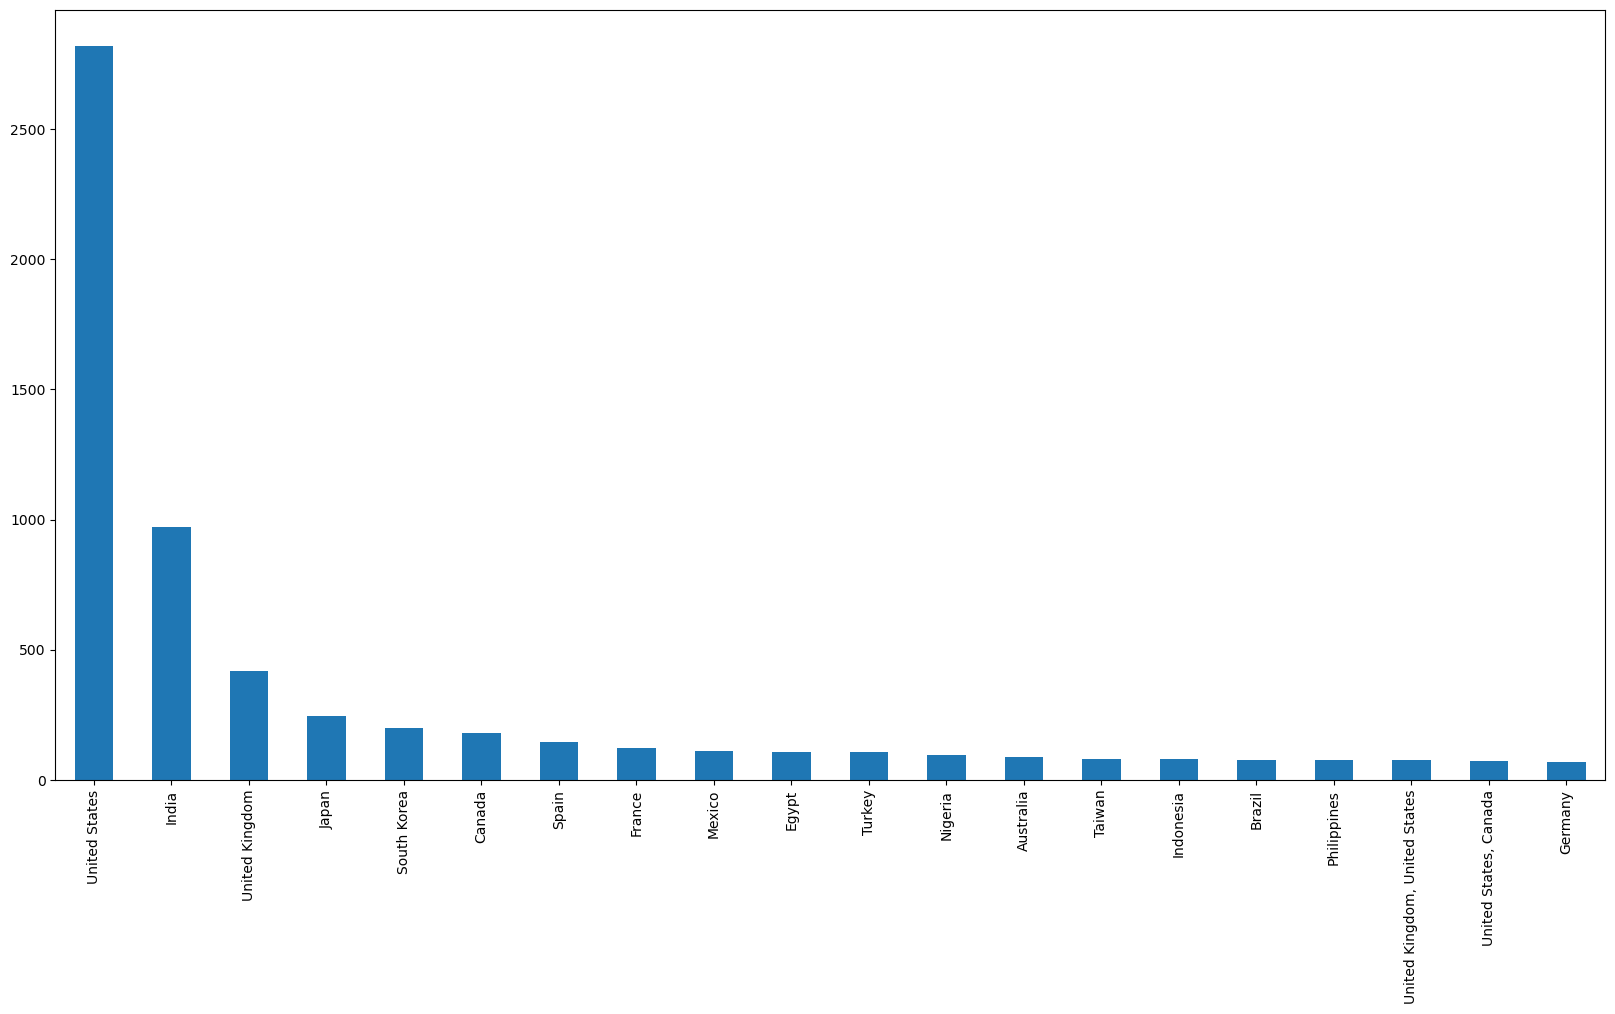

In [56]:
df["country"].value_counts().head(20).plot(kind="bar", figsize=(20, 10))

In [123]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9.0


In [132]:
Movie = df[df["type"]== "Movie"]
TV = df[df["type"]== "TV Show"]

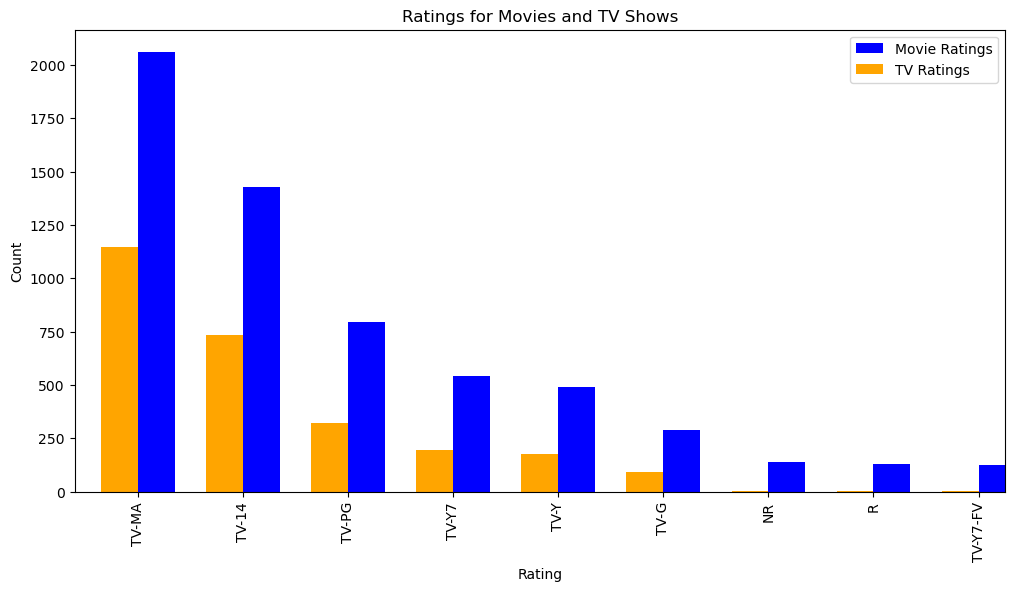

In [151]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot movie ratings with a different color
Movie["rating"].value_counts().plot(kind="bar", ax=ax, position=0, width=0.35, label='Movie Ratings', color='blue')

# Plot TV ratings with a different color
TV["rating"].value_counts().plot(kind="bar", ax=ax, position=1, width=0.35, label='TV Ratings', color='orange')

# Set labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Ratings for Movies and TV Shows')
ax.legend()

# Show the combined graph
plt.show()


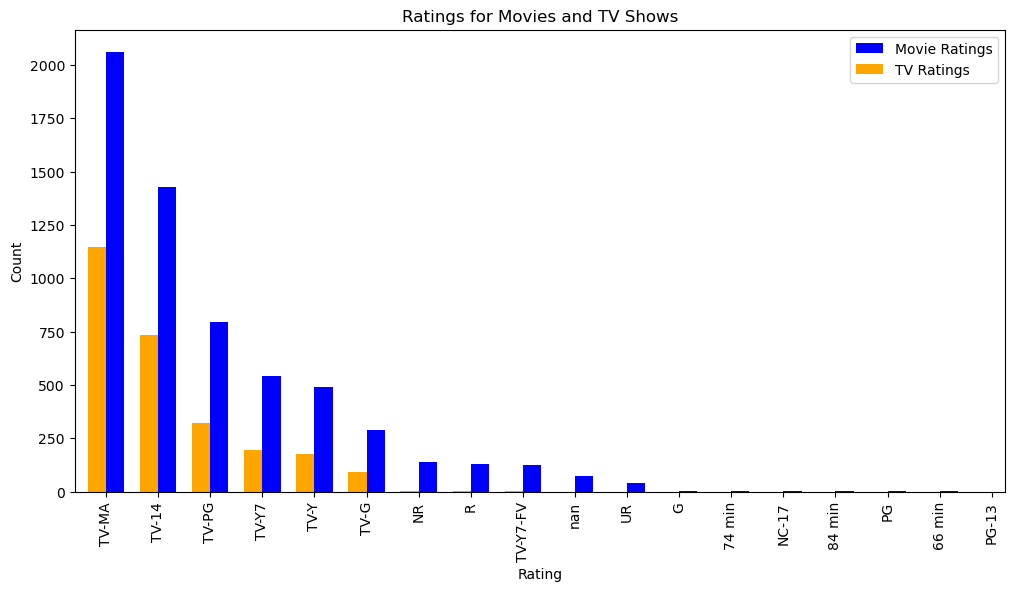

In [157]:
# Create a combined set of unique ratings
all_ratings = set(Movie["rating"].unique()).union(set(TV["rating"].unique()))

# Create a subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot movie ratings with a different color, sorted in descending order
Movie["rating"].value_counts().reindex(all_ratings).sort_values(ascending=False).plot(
    kind="bar", ax=ax, position=0, width=0.35, label='Movie Ratings', color='blue')

# Plot TV ratings with a different color, sorted in descending order
TV["rating"].value_counts().reindex(all_ratings).sort_values(ascending=False).plot(
    kind="bar", ax=ax, position=1, width=0.35, label='TV Ratings', color='orange')

ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Ratings for Movies and TV Shows')
ax.legend()

plt.show()



In [165]:
usa = df[df["country"] == "United States"]
usa.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9.0
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,9.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,9.0
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,9.0


In [173]:
usatv = usa[usa["type"]=="TV Show"]
usatv.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,9.0
40,s41,TV Show,He-Man and the Masters of the Universe,NaN,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,2021-09-16,2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...,NaN
55,s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,2021-09-15,2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...,9.0
67,s68,TV Show,Saved by the Bell,NaN,"Mark-Paul Gosselaar, Tiffani Thiessen, Mario L...",United States,2021-09-15,1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies","From middle school to college, best friends Za...",9.0
82,s83,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r...",9.0
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,2021-09-07,2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...,NaN
106,s107,TV Show,Bunk'd,NaN,"Peyton List, Karan Brar, Skai Jackson, Miranda...",United States,2021-09-05,2021,TV-G,5 Seasons,"Kids' TV, TV Comedies","The Ross siblings of Disney's hit series ""Jess...",9.0
125,s126,TV Show,Q-Force,NaN,"Sean Hayes, Wanda Sykes, Laurie Metcalf, David...",United States,2021-09-02,2021,TV-MA,1 Season,"Crime TV Shows, TV Action & Adventure, TV Come...",A gay superspy and his scrappy LGBTQ squad fig...,NaN
160,s161,TV Show,Major Dad,NaN,"Gerald McRaney, Shanna Reed, Nicole Dubuc, Che...",United States,2021-09-01,1992,TV-PG,4 Seasons,TV Comedies,When he marries a journalist and becomes stepd...,9.0
184,s185,TV Show,Sparking Joy,NaN,Marie Kondo,United States,2021-08-31,2021,TV-PG,1 Season,Reality TV,"In this reality series, Marie Kondo brings her...",NaN


<AxesSubplot:>

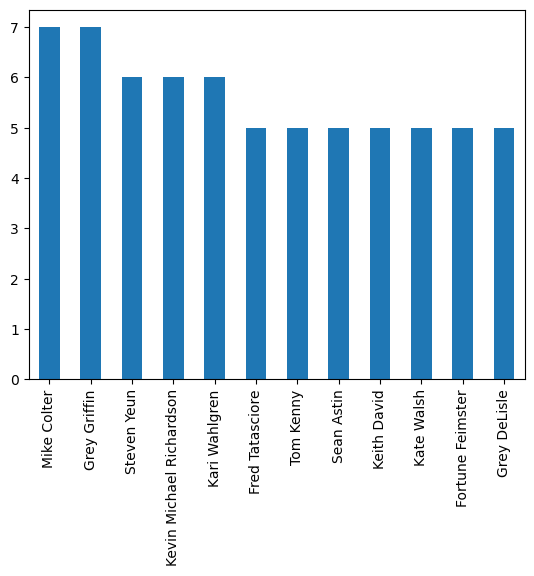

In [193]:
cast = usatv['cast'].str.split(', ', expand=True).stack()

# Reset the index to get the original DataFrame structure
cast = cast.reset_index(level=1, drop=True).rename('cast')


cast.value_counts().head(12).plot(kind="bar")

